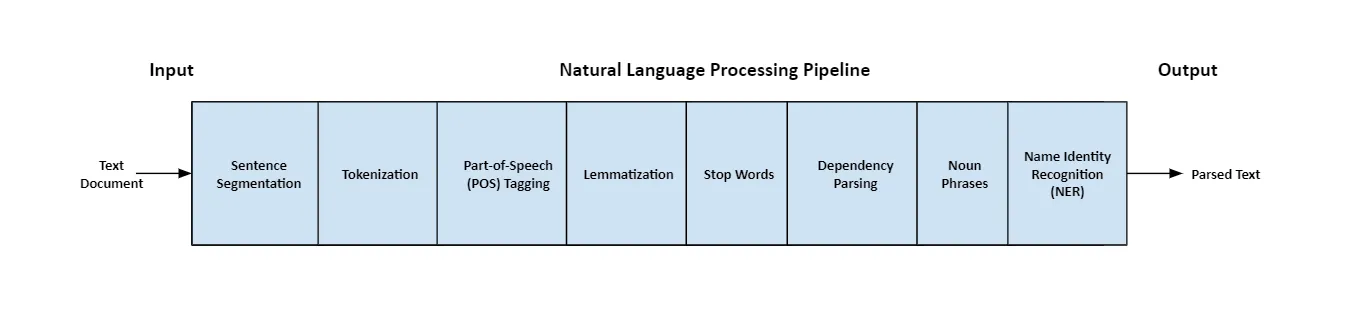

# NLP-Master Template

How do you work through various NLP related tasks using different Python packages for NLP ?

In this jupyter notebook you will work through the above mentioned steps of Data-preprocessing and feature extraction using different libraries for NLP.

There are many python packages for NLP out there, but we can cover the important bases once we master a handful of them. In this jupyter notebook we will describe following Python NLP libraries we’ve found to be the most useful and will be using in the case studies.

   * NLTK Book: https://www.nltk.org/    
   * TextBlob : https://textblob.readthedocs.io/en/dev/index.html    
   * Spacy : https://spacy.io/

In additional to these there are few other libraries such as Gensim and Stanford’s CoreNLP that can be explored as well.



## Content

* [1. Loading Libraries and Packages](#1)
* [2. Data Preprocessing](#2)
    * [2.1. Tokenization](#2.1)    
    * [2.2. Removing Stop Words](#2.2)
    * [2.3. Stemming](#2.3)
    * [2.4. Lemmetization](#2.4)
    * [2.5. PoS tagging](#2.5)
    * [2.6. Name Entity Recognition](#2.6)  
* [3. Feature Representation](#3)
    * [3.1. Bag-of Words](#3.1)    
    * [3.2. TF-IDF](#3.2)
    * [3.3. Word Embedding](#3.3)
* [4. Inference](#4)
    * [4.1. Supervised (Example Naive Bayes)](#4.1)    
    * [4.2. Unsupervised (Example LDA)](#4.2)
* [5. NLP Recipies](#5)
    * [5.1. Sentiment Analysis](#5.1)
    * [5.2. Words and Sentences similarity](#5.2)

<a id='1'></a>
# 1. Load libraries and Packages

As a first step we check if the additional packages needed are present, if not install them. These are checked separately as they aren't included in requirement.txt as they aren't used for all case studies.

In [ ]:
import pkg_resources
import pip
import sys
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'nltk', 'spacy', 'textblob','gensim' }
missing = required - installedPackages
if missing:
    !pip install nltk==3.4
    !pip install textblob==0.15.3
    !pip install gensim==3.8.2
    !pip install -U SpaCy==2.2.0
    !python -m spacy download en_core_web_lg

For NLTK, import NLTK and run nltk.download().This will open the NLTK downloader from where you can choose the corpora and models to download. You can also download all packages at once.

For spacy, download spacy core model by running the command "python -m spacy download en_core_web_sm". Once downloaded, load this int he jupyter notebook by using spacy.load()




In [ ]:
import nltk
import nltk.data
nltk.download('punkt')
from textblob import TextBlob
import spacy
#Run the command python -m spacy download en_core_web_sm to download this
# import en_core_web_lg
# ! spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

#Other helper packages
import pandas as pd
import numpy as np

#Download nltk data lobraries. All can be downloaded by using nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 2. Preprocessing

<a id='2.1'></a>
## 2.1. Tokenization
Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.

In [ ]:
#Text to tokenize
# text = "This is a tokenize test"
text = """Ty Cobb was suspended
for ten days during the 1912
baseball season. Cobb was disciplined
for beating Claude Lucker, a fan who had
been heckling him during the four-game series
between Cobb's Detroit Tigers and the New York
Yankees. Cobb was ejected from the game on May 15,
 1912, and American League president Ban Johnson
 suspended him indefinitely. Cobb's teammates
 took his side, and after defeating the Philadelphia
 Athletics on May 17, told Johnson that they would
 not play again until Cobb was reinstated.
 Johnson refused to do so. Seeking to avoid a
 $5,000 fine, owner Frank Navin told manager Hughie
 Jennings to recruit a team; he did so. Facing the Athletics,
  baseball's World Champions, the replacement players,
  joined by Jennings and his coaches, lost 24–2,
  after which Cobb persuaded his teammates to return.
  They and Cobb were fined, but Navin paid.
  The walkout was baseball's first major league strike;
  it had little effect, but teams
put additional security into stadiums"""

### NLTK

The NLTK data package includes a pre-trained Punkt tokenizer for English, which has alreayd been loaded before

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(text)

### TextBlob

In [ ]:
TextBlob(text).words

<a id='2.2'></a>
## 2.2. Stop Words Removal

Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words. The code for removing stop words using SpaCy library is shown below:

### NLTK

We first load the language model and store it in the stop_words variable. The stopwords.words('english') is a set of default stop words for English language model in NLTK. Next, we simply iterate through each word in the input text and if the word exists in the stop word set of the NLTK language model, the word is removed.

In [ ]:
# text = "S&P and NASDAQ are the two most popular indices in US"
len(text)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
text_tokens = word_tokenize(text)
tokens_without_sw= [word for word in text_tokens if not word in stop_words]

print(tokens_without_sw)
print(len(tokens_without_sw))

As we can see some of the stop words such as "are", "of", "most" etc are removed from the sentence.

<a id='2.3'></a>
## 2.3. Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.

In [ ]:
# text = "It's a Stemming testing"

### NLTK

In [ ]:
parsed_text = word_tokenize(text)

In [ ]:
# Initialize stemmer.
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

# Stem each word.
[(word, stemmer.stem(word)) for i, word in enumerate(parsed_text)
 if word.lower() != stemmer.stem(parsed_text[i])]

<a id='2.4'></a>
## 2.4. Lemmetization

A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.

### TextBlob

In [ ]:
# text = "This world has a lot of faces "

In [ ]:
from textblob import Word
parsed_data= TextBlob(text).words
parsed_data

In [ ]:
[(word, word.lemmatize()) for i, word in enumerate(parsed_data)
 if word != parsed_data[i].lemmatize()]

<a id='2.5'></a>
## 2.5. POS Tagging

Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words

In [ ]:
# text = 'Google is looking at buying U.K. startup for $1 billion'

### TextBlob

In [ ]:
TextBlob(text).tags

## Spacy- doing all at ones

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

![image.png](attachment:image.png)

All the preprocessing items including tokenization, stop words removal, lemmatization, getting POS and NER etc. can be performed in one go using spaCy. An example is demonstrated below. We will go through the example of NER in the next section.

In [ ]:
# text = 'Google is looking at buying U.K. startup for $1 billion'
doc = nlp(text)

In [ ]:
pd.DataFrame([[t.text, t.is_stop, t.lemma_, t.pos_]
              for t in doc],
             columns=['Token', 'is_stop_word','lemma', 'POS'])

spaCy also performs NER that we will discuss in the next section, along with the word embedding which we will also cover in the next section. Given NER performs a wide range of NLP related tasks in one go, it is highly recommended. We will be using spaCy extensively in our case studies. The list of all the task that can be performed using spaCy is mentioned in the list below.

In [ ]:
attributes = [a for a in dir(doc) if not a.startswith('_')]
print(attributes)

<a id='2.6'></a>
## 2.6. Name Entity Recognition

Named Entity Recognition, popularly referred to as N.E.R is a process that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is used in many fields in Natural Language Processing (NLP), and it can help answering many real-world questions. The NER performed using spaCy is shown below.

In [ ]:
# text = 'Google is looking at buying U.K. startup for $1 billion'

### SpaCy

In [ ]:
for entity in nlp(text).ents:
    print("Entity: ", entity.text)
    print("Entity Type: %s | %s" % (entity.label_, spacy.explain(entity.label_)))
    print("--")

In [ ]:
from spacy import displacy
displacy.render(nlp(text), style="ent", jupyter = True)

<a id='3'></a>
# 3. Feature Representation

The vast majority of NLP related data is created for human consumption and as such is stored
in an unstructured format, such as news feed articles, PDF reports, social media posts
and audio files, which cannot be readily processed by computers. Following the preprocessing steps discussed in the previous section, in order for the information content to be conveyed to the statistical inference algorithm, the preprocessed tokens need to be translated into predictive features. A model is used to embed raw text into a vector space where we can use the data science tool.

Feature representation involves two things:
* A vocabulary of known words.
* A measure of the presence of known words.

The intuition behind the Feature Representation is that documents are similar if they have similar content. Also, we can learn something about the meaning of the document from its content alone.
For example, if our dictionary contains the words {Learning, is, the, not, great}, and we want to vectorize the text “Learning is great”, we would have the following vector: (1, 1, 0, 0, 1).

Some of the feature representation methods are as follows:
* Bag of Words- word count
* Tf-Idf
* Word Embedding
    * Pretrained word embedding models ( Word2vec, GloVe)
    * Customized deep Learning based

There are Feature representation(or vector representation) such as one-hot encoding of text, n-grams etc which are similar to the types mentioned above.

<a id='3.1'></a>
## 3.1. Bag of Words - Word Count

In natural language processing, a common technique for extracting features from text is to place all of the words that occur in the text in a bucket. This aproach is called a bag of words model or BoW for short. It’s referred to as a “bag” of words because any information about the structure of the sentence is lost.The CountVectorizer from sklearn provides a simple way to both tokenize a collection of text documents and encode new documents using that vocabulary.The fit_transform
function learns the vocabulary from one or more documents and encodes each document in the word as a vector.

In [ ]:
sentences = [
'The stock price of google jumps on the earning data today',
'Google plunge on China Data!'
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print( vectorizer.fit_transform(sentences).todense() )
print( vectorizer.vocabulary_ )

We can see an array version of the encoded vector showing a count of 1 occurrence for each word except the (index and id 10) that has an occurrence of 2. Word counts are a good starting point, but are very basic.One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

<a id='3.2'></a>
## 3.2. TF-IDF

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

* Term Frequency: This summarizes how often a given word appears within a document.
* Inverse Document Frequency: This downscales words that appear a lot across documents.
Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
TFIDF = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names_out()[-10:])
print(TFIDF.shape)
print(TFIDF.toarray())

A vocabulary of 9 words is learned from the documents and each word is assigned a unique integer index in the output vector. The sentences are encoded as an 9-element sparse array and we can review the final scorings of each word with different values from the other words in the vocabulary.

<a id='3.3'></a>
## 3.3. Word Embedding

A word embedding is a class of approaches for representing words and documents using a dense vector representation.

It is an improvement over more the traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.

Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in the learned vector space is referred to as its embedding.

Two popular examples of methods of learning word embeddings from text include:
* Pretained models( i.e. Word2Vec, glove etc.)
* Developing custom models

In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.

### 3.3.1 Pretrained word embedding models

### 3.3.1.1  Pretrained model- SpaCy

SpaCy comes with inbuilt representation of text as vectors at different levels of word, sentence and document. The underlying vector representations come from a word embedding model which generally produces a dense multi-dimensional semantic representation of words (as shown in the example below). The word embedding model includes 20k unique vectors with 300 dimensions. Using this vector representation, we can calculate similarities and dissimilarities between tokens, named entities, noun phrases, sentences and documents.

The word embedding in Spacy is performed first by first loading the model, and then processing text. The vectors can be accessed directly using the .vector attribute of each processed token (word). The mean vector for the entire sentence is also calculated simply using .vector, providing a very convenient input for machine learning models based on sentences.

In [ ]:
doc = nlp("Apple orange cats dogs")

In [ ]:
print("Vector representation of the sentence for first 10 features: \n", doc.vector[0:10])

### 3.3.1.2. Word2Vec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# sentences = [
# ['The','stock','price', 'of', 'Google', 'increases'],
# ['Google','plunge',' on','China',' Data!']]
# # train model
# model = Word2Vec(sentences, min_count=1)
# # summarize the loaded model
# print(model)
# # summarize vocabulary
# model.wv.load

# words = list(model.wv.vocab)
# print(words)
# print(model['Google'][1:5])

In [ ]:
from gensim.models import Word2Vec

# Input sentences
sentences = [
    ['The', 'stock', 'price', 'of', 'Google', 'increases'],
    ['Google', 'plunge', 'on', 'China', 'Data!']
]

# Train model
model = Word2Vec(sentences, min_count=1)

# Summarize the loaded model
print(model)

# Summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# Print vector for 'Google'
print(model.wv['Google'][1:5])

<a id='4'></a>
# 4. Interpretation
Like all other artificial intelligence tasks, the inference generated by an NLP application
usually needs to be translated into a decision in order to be actionable.Inference in ML falls under three broad categories, namely supervised, unsupervised and reinforcement learning. While the type of inference required depends on the business problem and the type of training data, in NLP the most commonly used algorithms are
supervised or unsupervised.

In the past years, neural network architectures, such as recurrent neural networks (RNNs) and convolutional neural networks (CNNs), have dominated NLP-based inference.

<a id='4.1'></a>
## 4.1. Supervised Learning Example-Naive Bayes

One of the most commonly used supervised methodologies in NLP is the Naïve
Bayes model, which assumes that all word features are independent of each other given
the class labels. Due to this simplifying assumptions, Naïve Bayes is very compatible with a bag-of-words word representation.

In [ ]:
senteces = [
'The stock price of google jumps on the earning data today',
'Google plunge on China Data!']
sentiment = (1, 0)
data = pd.DataFrame({'Sentence':senteces,
        'sentiment':sentiment})

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(data['Sentence'])
X_train_vectorized = vect.transform(data['Sentence'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, data['sentiment'])

preds = clfrNB.predict(vect.transform(['Apple price plunge', 'Amazon Price jumps']))
preds

As we can see that the Naive Bayes trains the model fairly well from the two sentences. The model gives a sentiment of 0 for the sentence "Apple price plunge" and 1 for the sentence "Amazon Price jumps", given the sentence used for training also had keywords "plunge" and "jumps" as were assigned to sentiments of 0 and 1 respectively.

<a id='4.2'></a>
## 4.2. Unsupervised Learning Example-LDA
LDA model is the most popular topic model because it tends to produce meaningful topics that
humans can relate to, can assign topics to new documents, and is extensible. Variants of
LDA models can include metadata such as authors, or image data, or learn hierarchical
topics
Given a set of documents, assume that there are some latent topics of documents that are not observed. Each document has a distribution over these topics.

In [ ]:
sentences = [
'The stock price of google jumps on the earning data today',
'Google plunge on China Data!'
]

In [ ]:
#Getting the bag-of words
from sklearn.decomposition import LatentDirichletAllocation
vect=CountVectorizer(ngram_range=(1,1),stop_words='english')
sentences_vec=vect.fit_transform(sentences)

#Running LDA on the bag of words.
from sklearn.feature_extraction.text import CountVectorizer
lda=LatentDirichletAllocation(n_components=3)
lda.fit_transform(sentences_vec)

The model produces two smaller matrices. We will be discussing the interpretation further in the third case study.

<a id='5'></a>
# 5 NLP Recipies

<a id='5.1'></a>
## 5.1. Sentiment Analysis

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping us understand the sentiments behind a text.

With the help of Sentiment Analysis using Textblob the sentiment analysis can be performed in few lines of code. TextBlob provides polarity and subjectivity estimates for parsed documents using dictionaries provided by the Pattern library. The polarity defines the phase of emotions expressed in the analyzed sentence. Polarity alone is not enough to deal with complex text sentences. Subjectivity helps in determining personal states of the speaker including Emotions, Beliefs and opinions. It has values from 0 to 1 and a value closer to 0 shows the sentence is objective and vice versa.

The texblob sentiment function is pretrained and map adjectives frequently found in movie reviews(source code: https://textblob.readthedocs.io/en/dev/_modules/textblob/en/sentiments.html) to sentiment polarity scores, ranging from -1 to +1 (negative ↔ positive) and a similar subjectivity score (objective ↔ subjective).

The .sentiment attribute provides the average for each over the relevant tokens, whereas the .sentiment_assessments attribute lists the underlying values for each token.

In [ ]:
text1 = "Bayer (OTCPK:BAYRY) started the week up 3.5% to €74/share in Frankfurt, touching their highest level in 14 months, after the U.S. government said a $25M glyphosate decision against the company should be reversed."
text2 = "Apple declares poor in revenues"

In [ ]:
TextBlob(text1).sentiment.polarity

In [ ]:
TextBlob(text1).sentiment_assessments

In [ ]:
TextBlob(text2).sentiment.polarity

In [ ]:
TextBlob(text2).sentiment_assessments

We see that the first sentiment has positive sentiment and the second text has negative sentiments. Looking at the subjectivity, the second sentence has more subjectivity as compared to the first one. However, looking at the words that give rise to the sentiments, the word "touching" and not "high" causes positive sentiment in sentence one. So, probably a sentiment analysis algorithm pretrained on movie/product reviews might not perform well with news sentiment analysis. Hence probably, additional training for the stock sentiments might be needed.

<a id='5.2'></a>
## 5.2. Text Similarity
Finding similarity between text is at the heart of almost all text mining methods, for example, text classification, clustering, recommendation, and many more. In order to calculate similarity between two text snippets, the usual way is to convert the text into its corresponding vector representation, for which there are many methods like word embedding of text, and then calculate similarity or difference using different distance metrics such as cosine-similarity and euclidean distance applicable to vectors. The underlying vector representations come from a word embedding model which generally produces a dense multi-dimensional semantic representation of words (as shown in the example). Using this vector representation, we can calculate similarities and dissimilarities between tokens, named entities, noun phrases, sentences and documents. The example below shows how to calculate similarities between two documents and tokens.

In [ ]:
text1 = "Barack Obama was the 44th president of the United States of America."
text2 = "Donald Trump is the 45th president of the United States of America."
text3 = "SpaCy and NLTK are two popular NLP libraries in Python community."
doc1 = nlp(text1); doc2 = nlp(text2); doc3 = nlp(text3);

In [ ]:
def text_similarity(inp_obj1, inp_obj2):
    return inp_obj1.similarity(inp_obj2)

In [ ]:
print("Similarity between doc1 and doc2: ", text_similarity(doc1, doc2))
print("Similarity between doc1 and doc3: ", text_similarity(doc1, doc3))

In [ ]:
def token_similarity(doc):
    for token1 in doc:
        for token2 in doc:
            print("Token 1: %s, Token 2: %s - Similarity: %f" % (token1.text, token2.text, token1.similarity(token2)))

doc4 = nlp("Apple orange cats")
token_similarity(doc4)